In [7]:
import pandas as pd

In [9]:
import pandas as pd

file_path = r"D:\Rishika Internship\snapdeal_products_clean_data.csv"

df = pd.read_csv(file_path, encoding="latin1")  
print(df.head())


   Top Section                       Subcategory  \
0  Accessories  Car & Vehicle Electronics\r\n408   
1  Accessories  Car & Vehicle Electronics\r\n408   
2  Accessories  Car & Vehicle Electronics\r\n408   
3  Accessories  Car & Vehicle Electronics\r\n408   
4  Accessories  Car & Vehicle Electronics\r\n408   

                                        Product Name  \
0  Selifaur Electronics Accessory For Car 2 m ( P...   
1  Selifaur Electronics Accessory For Car 2 m ( P...   
2  Selifaur Electronics Accessory For Car 2 m ( P...   
3  Selifaur Electronics Accessory For Car 2 m ( P...   
4  Selifaur Electronics Accessory For Car 2 m ( P...   

  Brand (heuristic/listing) Price Original Price  Discount  Rating (detail)  \
0                  Selifaur   437          1,299      66.0              0.0   
1                  Selifaur   437          1,299      66.0              0.0   
2                  Selifaur   437          1,299      66.0              0.0   
3                  Selifaur   437 

In [10]:
# See columns, data types, and null counts
df.info()

# Only null count per column
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660 entries, 0 to 5659
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Top Section                5660 non-null   object 
 1   Subcategory                5660 non-null   object 
 2   Product Name               5660 non-null   object 
 3   Brand (heuristic/listing)  5660 non-null   object 
 4   Price                      5660 non-null   object 
 5   Original Price             5660 non-null   object 
 6   Discount                   5645 non-null   float64
 7   Rating (detail)            5651 non-null   float64
 8   Reviews Count (listing)    5660 non-null   int64  
 9   Target Audience            5660 non-null   object 
 10  Discount Bin               5645 non-null   object 
 11  Price Bin                  5660 non-null   object 
 12  Original Price Bin         5660 non-null   object 
 13  Rating(detail) bin         5651 non-null   objec

Top Section                     0
Subcategory                     0
Product Name                    0
Brand (heuristic/listing)       0
Price                           0
Original Price                  0
Discount                       15
Rating (detail)                 9
Reviews Count (listing)         0
Target Audience                 0
Discount Bin                   15
Price Bin                       0
Original Price Bin              0
Rating(detail) bin              9
Color                         532
Pack Of                      1956
Binding                      5657
waterproof                   5631
Type                          805
dtype: int64

In [12]:
total_rows = len(df)
print("Total rows:", total_rows)


Total rows: 5660


In [16]:
# drop the unnecessary columns
cols_to_drop = ["Waterproof", "Binding", "Pack of", "Colour","Type"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])


In [17]:
# fill text column 
text_cols = [
    "Top Section",
    "Subcategory",
    "Target Audience",
    "Discount Bin",
    "Price Bin",
    "Brand (heuristic/listing)"
]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")


In [19]:
#  FIXING NUMERIC COLUMNS

# Step 1: choose important numeric columns
numeric_cols = ["Price", "Original Price", "Discount", "Rating (detail)"]

# Step 2: convert them to numeric (errors="coerce" → bad values become NaN)
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Step 3: drop rows where Price or Discount is missing 
must_have = [c for c in ["Price", "Discount"] if c in df.columns]
df = df.dropna(subset=must_have)

# Step 4: fill missing Rating with median (so we don't lose rows)
if "Rating (detail)" in df.columns:
    df["Rating (detail)"] = df["Rating (detail)"].fillna(df["Rating (detail)"].median())


In [20]:
# SAVE cleaned file
df.to_csv("D:/Rishika Internship/snapdeal_products_clean_data_cleaned.csv", index=False)

#  print message
print("Cleaning done and file saved ✅")

Cleaning done and file saved ✅


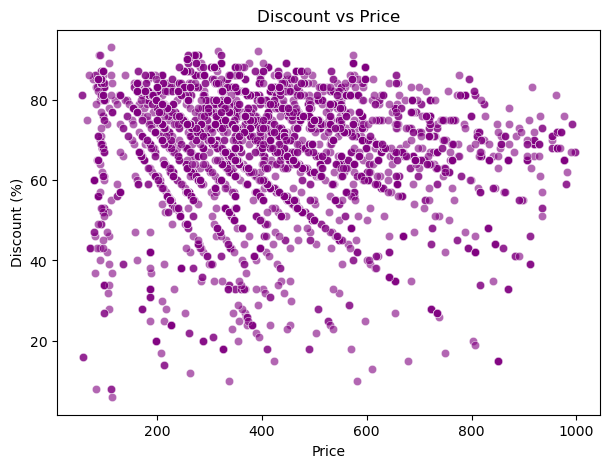

In [42]:
# Object-I want to show how discount varies with price range, which visual would best the relationship :histogram,scatterplot,line chart? explain why

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Price', y='Discount', color='purple',alpha=0.6)
plt.title('Discount vs Price')
plt.xlabel('Price')
plt.ylabel('Discount (%)')
plt.show()

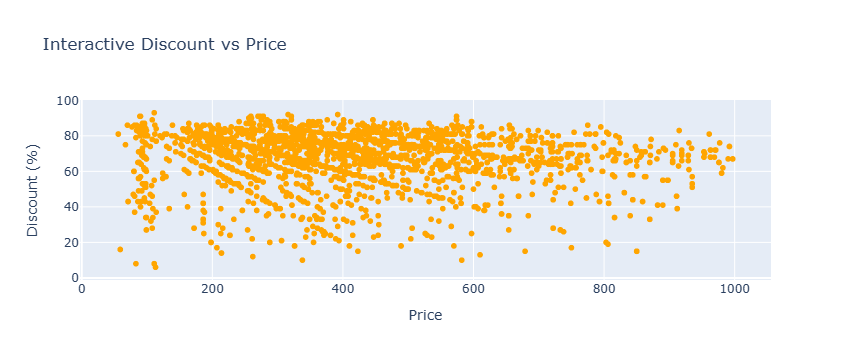

In [49]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Price',
    y='Discount',
    title='Interactive Discount vs Price',
    labels={'Price': 'Price', 'Discount': 'Discount (%)'},
    color_discrete_sequence=['orange']   # change color
)

fig.show()


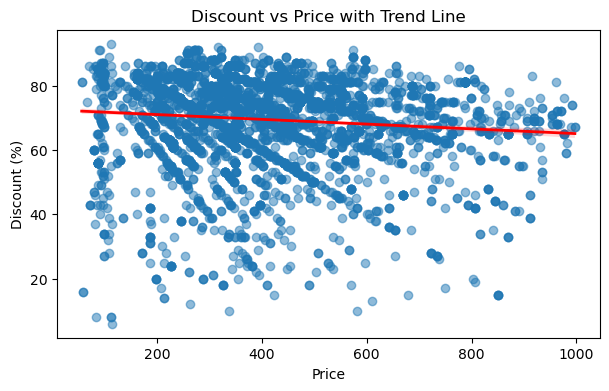

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.regplot(data=df, x='Price', y='Discount',
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red', 'linewidth':2})
plt.title('Discount vs Price with Trend Line')
plt.xlabel('Price')
plt.ylabel('Discount (%)')
plt.show()


In [ ]:
#I used a scatter plot to show how discount changes with price.I added a trend line to see the overall pattern

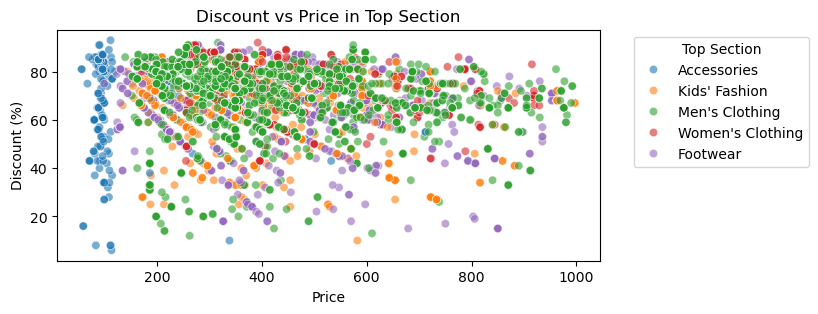

In [58]:
plt.figure(figsize=(7,3))
sns.scatterplot(data=df, x='Price', y='Discount', hue='Top Section', alpha=0.6)
plt.title('Discount vs Price in Top Section')
plt.xlabel('Price')
plt.ylabel('Discount (%)')
plt.legend(title='Top Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
